In [92]:
%%capture 

#!# This example shows the computation of the DC bias and sensitivity in a voltage divider.

####################################################################################################

import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()

####################################################################################################

from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *
from IPython.display import Image
####################################################################################################

import math
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,5)

####################################################################################################

from PySpice.Probe.Plot import plot

from PySpice.Spice.NgSpice.Shared import NgSpiceShared

%matplotlib inline

![Circuit](voltage.png)

In [93]:
import os
import sys  

try:
  import ipython_circuitikz.circuitikz
except ImportError:
  # Assuming CWD is where we started Jupyter in/
  assert os.path.isfile('C:/Users/mopfe/Dropbox/HRW/ipython_circuitikz/circuitikz.py')
  sys.path.append('C:/Users/mopfe/Dropbox/HRW/')
  import ipython_circuitikz.circuitikz
    
%reload_ext ipython_circuitikz.circuitikz

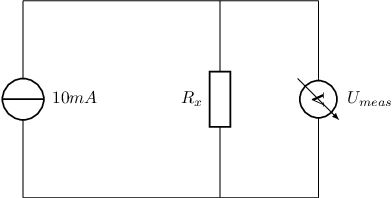

In [94]:
%%circuitikz filename=current_measurement dpi=125
\begin{circuitikz}
  \draw (0,0) to [short] (4,0);
  \draw  (4,0)  to [R, l=$R_{x}$] (4,4);
  \draw (4,4) to [short] (0,4);
  \draw (0,4)  to [I, l=$10 mA$] (0,0);
  \draw  (4,4) to [short,] (6,4);
  \draw (6,4) to [voltmeter, l=$U_{meas}$] (6,0);
   \draw  (6,0) to [short,] (4,0);
\end{circuitikz}

In [95]:
circuit = Circuit('Current_Measurement')

#internal Resistance
internal_resistance = 10 #Units of Ohms
#Voltmeter Resistance
vm_res = 1000 #Units of kOhms

circuit.I('input', 'out', circuit.gnd, 0.01@u_A)
circuit.R(1, 'out', circuit.gnd, internal_resistance@u_Ω)
circuit.R(2, 'out', circuit.gnd, vm_res@u_kΩ)

####################################################################################################

simulator = circuit.simulator(temperature=25, nominal_temperature=25)

In [96]:
%%capture
sweep = slice(0,0.01,0.001)
analysis = simulator.dc(Iinput=slice(0, 0.01, .001))
print('Lead Resistance: {} Ω' .format(float(internal_resistance)))
print('Voltmeter Resistance: {} kΩ' .format(float(vm_res)))

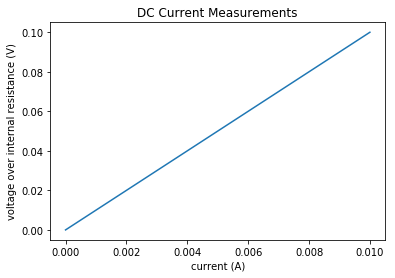

In [97]:
plt.plot( analysis.sweep, -analysis.out)
plt.title('DC Current Measurements')
plt.xlabel('current (A)')
plt.ylabel('voltage over internal resistance (V)')
plt.show()

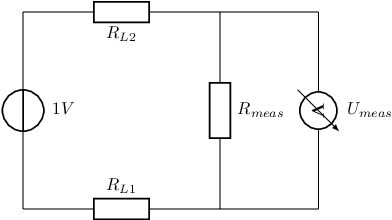

In [98]:
%%circuitikz filename=voltage_measurement dpi=125
\begin{circuitikz}
  \draw (0,0) to [R, l=$R_{L1}$] (4,0);
  \draw (4,4) to [R, l=$R_{L2}$] (0,4);
  \draw (4,4) to [R, l=$R_{meas}$] (4,0);
  \draw (0,4) to [V, l=$1 V$] (0,0);
  \draw  (4,4) to [short,] (6,4);
  \draw (6,4) to [voltmeter, l=$U_{meas}$] (6,0);
   \draw  (6,0) to [short,] (4,0);
\end{circuitikz}

In [99]:
circuit = Circuit('Voltage_Measurement')

#lead Resistances
l1_res = 1000 #Units of Ohms
l2_res = 1000 #Ohms
#Voltmeter Resistance
vm_res = 1000 #Units of kOhms

circuit.V('input', 1, circuit.gnd, 1@u_V)
circuit.R(1, 1, 'out', l1_res@u_Ω)
circuit.R(2, circuit.gnd, 'zero', l2_res@u_Ω)
circuit.R(3, 'zero', 'out', vm_res@u_Ω)
####################################################################################################

simulator = circuit.simulator(temperature=25, nominal_temperature=25)

In [100]:
%%capture
analysis = simulator.dc(Vinput=slice(0, 10, .01))

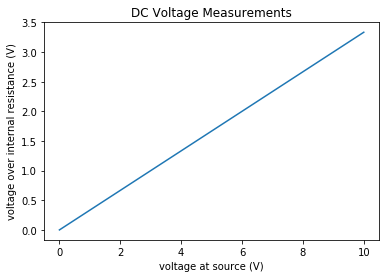

In [101]:
plt.plot(analysis.sweep, analysis.out - analysis.zero )
plt.title('DC Voltage Measurements')
plt.xlabel('voltage at source (V)')
plt.ylabel('voltage over internal resistance (V)')         
plt.show()

![Circuit](voltage_ranges_2.png)

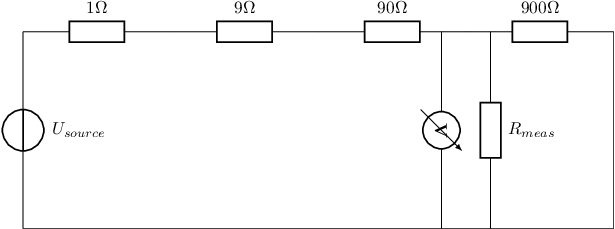

In [102]:
%%circuitikz filename=voltage_measurement_ranges dpi=125
\begin{circuitikz}
  \draw (0,4) to [R, l=$1 \Omega$] (3,4);
  \draw (3,4) to [R, l=$9 \Omega$] (6,4);
  \draw (6,4) to [R, l=$90 \Omega$] (9,4);
  \draw (9,4) to [R, l=$900 \Omega$] (12,4);
  \draw (9.5,4) to [R, l=$R_{meas}$] (9.5,0);
  \draw (0,4) to [V, l=$U_{source}$] (0,0);
  \draw (8.5,4) to [voltmeter,] (8.5,0);
    \draw (12,4) to [short,] (12,0);
   \draw  (12,0) to [short,] (0,0);
\end{circuitikz}

In [103]:
circuit2 = Circuit('Voltage_Measurement_Ranges')

#Voltmeter Resistance
vm_res = 10000 #Units of kOhms
r_1 = 900 #Units of kOhms
r_10 = 90 #Units of kOhms
r_100 = 9 #Units of kOhms
r_base = 1 #Units of kOhms

circuit2.V('source', 'src', circuit2.gnd, 100@u_V)
circuit2.R(1, 'src', 'r_1', r_1@u_kΩ)
circuit2.R(2, 'r_1', 'r_10', r_10@u_kΩ)
circuit2.R(3, 'r_10', 'r_100', r_100@u_kΩ)
circuit2.R(4, 'r_100', circuit2.gnd, r_base@u_kΩ)
circuit2.R(5, 'r_10', circuit2.gnd, vm_res@u_kΩ)

####################################################################################################

simulator = circuit2.simulator(temperature=25, nominal_temperature=25)

analysis = simulator.operating_point()

print('Voltmeter Resistance: {} kΩ' .format(float(vm_res)))

for node in (analysis['src'],analysis['r_1'], analysis['r_10'], analysis['r_100']): # .in is invalid !
    print('Node {}: {} V'.format(str(node), float(node)))

Voltmeter Resistance: 10000.0 kΩ
Node src: 100.0 V
Node r_1: 9.99910089011878 V
Node r_10: 0.9990109791306605 V
Node r_100: 0.09990109791306606 V
